In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [9]:
# loading datasets
movies = pd.read_csv(r"C:\\Users\\ANAND\\Downloads\\movie_data\\movies.csv")
ratings = pd.read_csv(r"C:\\Users\\ANAND\\Downloads\\movie_data\\ratings.csv")
links = pd.read_csv(r"C:\\Users\\ANAND\\Downloads\\movie_data\\links.csv")
tags = pd.read_csv(r"C:\\Users\\ANAND\\Downloads\\movie_data\\tags.csv")

In [11]:
# movies shape
print(movies.shape)

(9742, 3)


In [46]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [12]:
# ratings shape
print(ratings.shape)

(100836, 4)


In [48]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [49]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [16]:
# find the number of unique user IDs
unique_users = ratings['userId'].nunique()
print(unique_users)

610


In [21]:
# group the ratings by movie and count them:
movie_ratings_count = ratings.groupby('movieId').size()
most_rated_movie_id = movie_ratings_count.idxmax()


In [23]:
# the movie title from movies.csv
most_rated_movie = movies[movies['movieId'] == most_rated_movie_id]
print(most_rated_movie)

     movieId                title                    genres
314      356  Forrest Gump (1994)  Comedy|Drama|Romance|War


In [27]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [31]:

# Find the movieId for "Matrix, The (1999)"

matrix_movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]
print(f"Movie ID for 'Matrix, The (1999)': {matrix_movie_id}")


Movie ID for 'Matrix, The (1999)': 2571


In [30]:
# Filter tags for the movieId of "Matrix, The (1999)
'''Select all the correct tags submitted by users to "Matrix, The (1999)" movie? '''

matrix_tags = tags[tags['movieId'] == matrix_movie_id]

# Print unique tags for this movie
print(matrix_tags['tag'].unique())


['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [32]:
# Get movieId for "Terminator 2: Judgment Day (1991)"

terminator_movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
# Calculate average rating
average_rating = ratings[ratings['movieId'] == terminator_movie_id]['rating'].mean()
average_rating


3.970982142857143

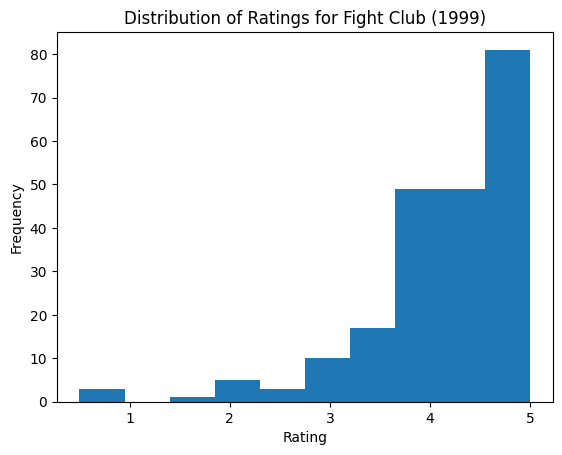

In [33]:

# Get movieId for "Fight Club (1999)"
fight_club_movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]
# Plot the distribution of ratings
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]['rating']
plt.hist(fight_club_ratings, bins=10)
plt.title('Distribution of Ratings for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# RIGHT SKEWED DISTRIBUTION

In [34]:
# Group ratings by movieId and calculate count and mean
movie_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']})
movie_ratings.columns = ['rating_count', 'rating_mean']

# Inner join with movies.csv
movies_ratings = movies.merge(movie_ratings, on='movieId')

# Filter movies with more than 50 ratings
popular_movies = movies_ratings[movies_ratings['rating_count'] > 50]


In [35]:
# Find the movie with the highest average rating
most_popular_movie = popular_movies.loc[popular_movies['rating_mean'].idxmax()]
most_popular_movie


movieId                                      318
title           Shawshank Redemption, The (1994)
genres                               Crime|Drama
rating_count                                 317
rating_mean                             4.429022
Name: 277, dtype: object

In [36]:
# Find the top 5 movies by number of user ratings
top_5_movies = popular_movies.sort_values(by='rating_count', ascending=False).head(5)
top_5_movies[['title']]


,title
314,Forrest Gump (1994)
277,"Shawshank Redemption, The (1994)"
257,Pulp Fiction (1994)
510,"Silence of the Lambs, The (1991)"
1938,"Matrix, The (1999)"
